<b>Code Imports</b>

In [44]:
%matplotlib inline

import numpy as num
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

<h><b><u>Lorenz Equations</u></b></h>
$$\frac{dx}{dt}=\sigma(y-x)$$
$$\frac{dy}{dt}=x(\rho - z) - y$$
$$\frac{dz}{dt}=xy-\beta z$$


<b>Lorenz System - RK4 Approximation</b> 

In [45]:
# Lorenz Values, modify values to modify system
# NOTE: Lorenz values are typically positive
ρ = 28; σ = 10; β = 8/3
x = 1; y = 1; z = 1
# Lorenz Equations
Lx = lambda x,y,z: σ*(y - x)
Ly = lambda x,y,z: x*(ρ- z) - y
Lz = lambda x,y,z: x*y - β*z

def L(ω):
    # ω is an array containing values approximated values for x, y, z
    return Lx(ω[0],ω[1],ω[2]), Ly(ω[0],ω[1],ω[2]), Lz(ω[0],ω[1],ω[2])


def k_Mult(h, ω, kx, x):
    Ω = ω
    j = 0
    if x == 1:
        j = 0
    if x == 2 or x == 3:
        j = 0.5
    else:
        j = 1
    for i in range(0,3):
        Ω[i] = ω[i] + j*(kx[i])
    return h*Lx(Ω[0],Ω[1],Ω[2]), h*Ly(Ω[0],Ω[1],Ω[2]), h*Lz(Ω[0],Ω[1],Ω[2])


# Specialized RK4 for Lorenz Equations

def L_RK4(a, b, α, N):
# INPUTS: Bounds a and b, initial values α, and sub-intervals N
# OUTPUTS: approximation of the functions fx, fy, fz
    h = (b-a)/N
    t = a
    ω = α
    fx = num.zeros((N+1), dtype = float)
    fy = num.zeros((N+1), dtype = float)
    fz = num.zeros((N+1), dtype = float)
    fx[0] = ω[0]
    fy[0] = ω[1]
    fz[0] = ω[2]
    
    for j in range(1, N+1):
        # Initialize for use of k_Mult function
        
        k1 = k_Mult(h, ω, ω, 1)
        k2 = k_Mult(h, ω, k1, 2)
        k3 = k_Mult(h, ω, k2, 3)
        k4 = k_Mult(h, ω, k3, 4)
        
        # Recalculate ω for next iteration
        for i in range(0, 3):
            ω[i] = ω[i] + (k1[i] + 2*k2[i] + 2*k3[i] + k4[i])/6;
        
        fx[j] = ω[0]
        fy[j] = ω[1]
        fz[j] = ω[2]
        
    return fx, fy, fz




# range of t values
a = 0
b = 1
# initial value for IVPs
α = [1,1,1]
# number of subintervals used to approximate equations
N = 1
# (delta)t of the function
h = (b-a)/N

Y = L_RK4(a,b,α,N)
print(Y)


(array([  1.        , 593.85185185]), array([1.00000000e+00, 6.21567189e+05]), array([ 1.00000000e+00, -1.81628107e+04]))


<b>Creation of 3D Plot</b>

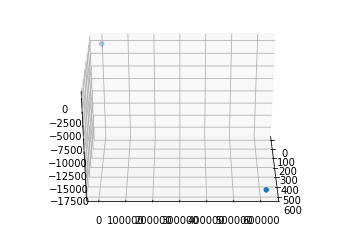

In [46]:
fig = plt.figure();
ax = plt.axes(projection='3d');
ax.view_init(30, 0)
# ax.plot3D(Y[0],Y[1],Y[2], 'pink');
ax.scatter3D(Y[0], Y[1], Y[2]);


In [47]:
# 10/16/2018 - Modified k_Mult; removed h from Ω calculation into return statements
# 10/18/2018 - Modified L_RK4; allocated x(t), y(t), and z(t) seperately to produce accurate results